# **Assignment 4** - Introduction to Machine Learning: Signal, Image, and Volume Processing
#### **Author**: Shakthi Visagan
#### **Purpose**: Introduction to image processing

Machine learning and most algorithmic enterprises have one goal: extract the signal from the noise. In this assignment, we'll cover what the signal and the noise looks like in data, and introduce some tools to manipulate and learn about the data. These tools will ultimately build the fundamental operational units used in neural networks.

---

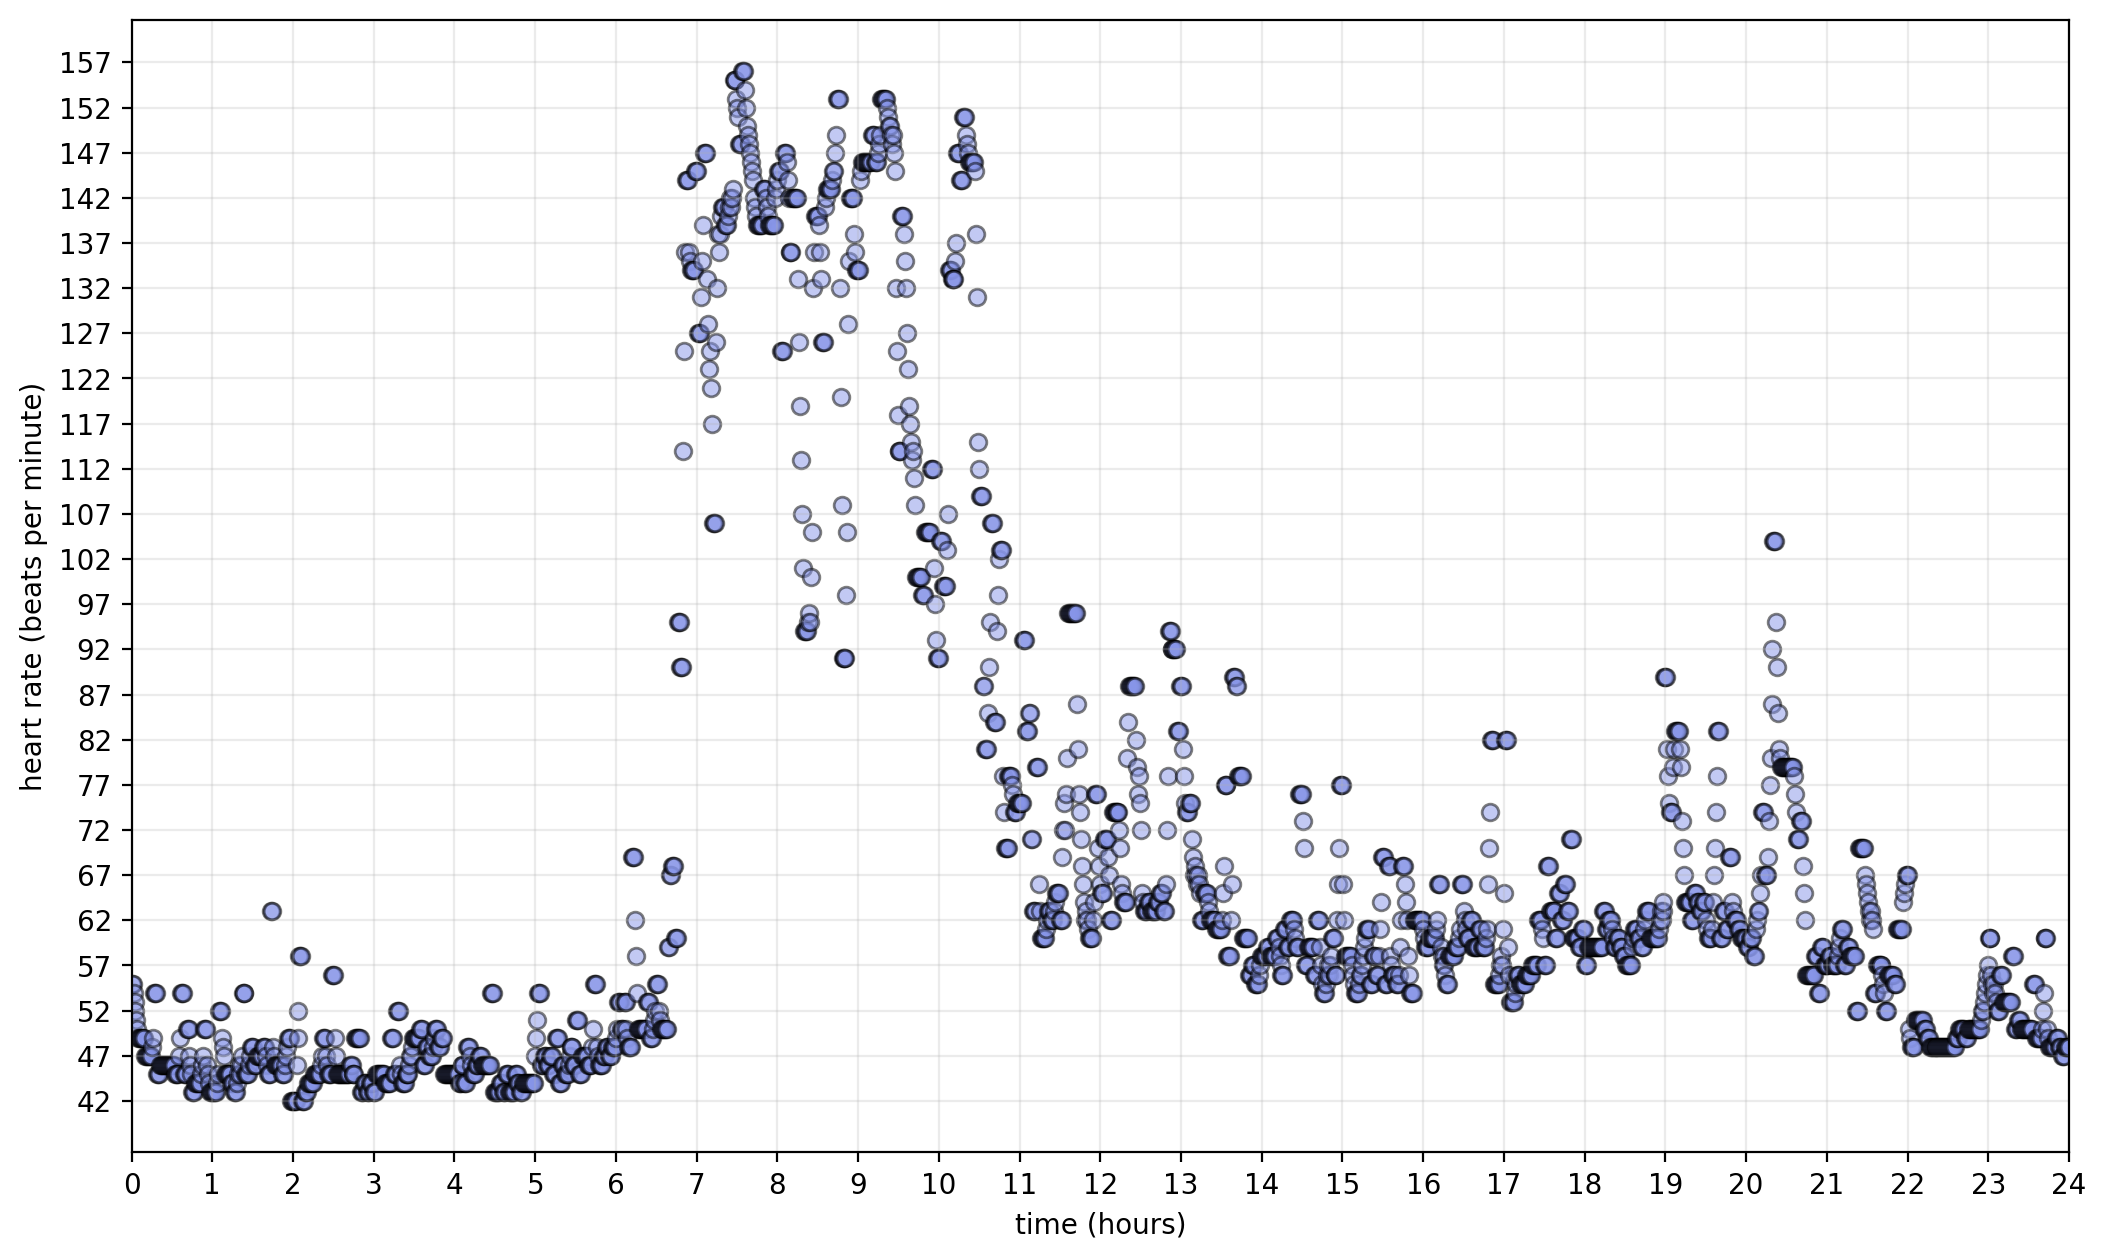

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_reader = csv.reader(open('data/data1_HR.csv'))
Y = np.expand_dims(np.squeeze(np.asarray(list(csv_reader), dtype=int)), axis=1)
X = np.expand_dims(np.linspace(start=0, stop=24, num=len(Y)), axis=1)
plt.figure(1, figsize=(12.5, 7.5), dpi=200)

plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')

plt.show()

(1a) What is the time resolution of this data? Your answer should be in units of number of data points per unit time. Assume that the data was collected in a single day (24 hours). Write how many data points were collected per hour and per minute. This is also called the rate of data collection.

Write your code and answers as comments below.

In [2]:
print(len(Y)/24)
# 82.25 data points/hour
print(len(Y)/(24*60))
# 1.3 data points/min

82.25
1.3708333333333333


(1b) Plot a histogram of the data so we can see what the distribution of heart rate values are. Use `bins=100` as an argument for your plotting function from `matplotlib.pyplot`. Is this a monomodal, bimodal, or trimodal distribution? Look up what these terms mean if you are unsure of their definition. What does the number of modes in the data tell you about the nature of heart rate through out the data.

Write your code and answers as comments below. Show your plot as well.

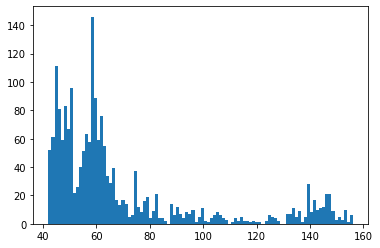

In [3]:
plt.hist(Y,bins=100)
plt.show()
# possibly bimodal or trimodal

(1c) Review. Plot a 5th-order polynomial to this data. Does a polynomial regression even make sense here? Is this an appropriate model for the data? Most of the plotting code is done for you, just change the line that plots the linear regression line.

Write your code and answers as comments below. Show your plot as well.

In [4]:
m = len(X)
Y_vec = Y
# create the matrix for X using numpy
# recall that X should be of shape (m,6)
# that is, it should have m rows
# and 6 columns
# the first column should be all 1s
# the second column should be x
# the third column should be the square of x
# the fourth column should be the cube of x
# the fifth column should be the fourth power of x
# the sixth column should be the fifth power of x
### Write code below ###
X_arr = np.hstack((np.ones((m,1)),X,X**2,X**3,X**4,X**5))
### Write code above ###
assert X_arr.shape[0] == m
assert X_arr.shape[1] == 6
assert np.allclose(X_arr[:,0],np.ones((m)))
assert np.allclose(X_arr[:,1], np.squeeze(X))


# transposing a numpy array is extremely easy
# taking matrix multiplication is also straight-
# forward with numpy
XTX = np.matmul(X_arr.T,X_arr)
XTY = np.matmul(X_arr.T,Y_vec)


# use np.linalg.solve to solve (X.T*X)*betas=(X.T*Y)
### Write code below ###
betas = np.linalg.solve(XTX,XTY)
### Write code above ###

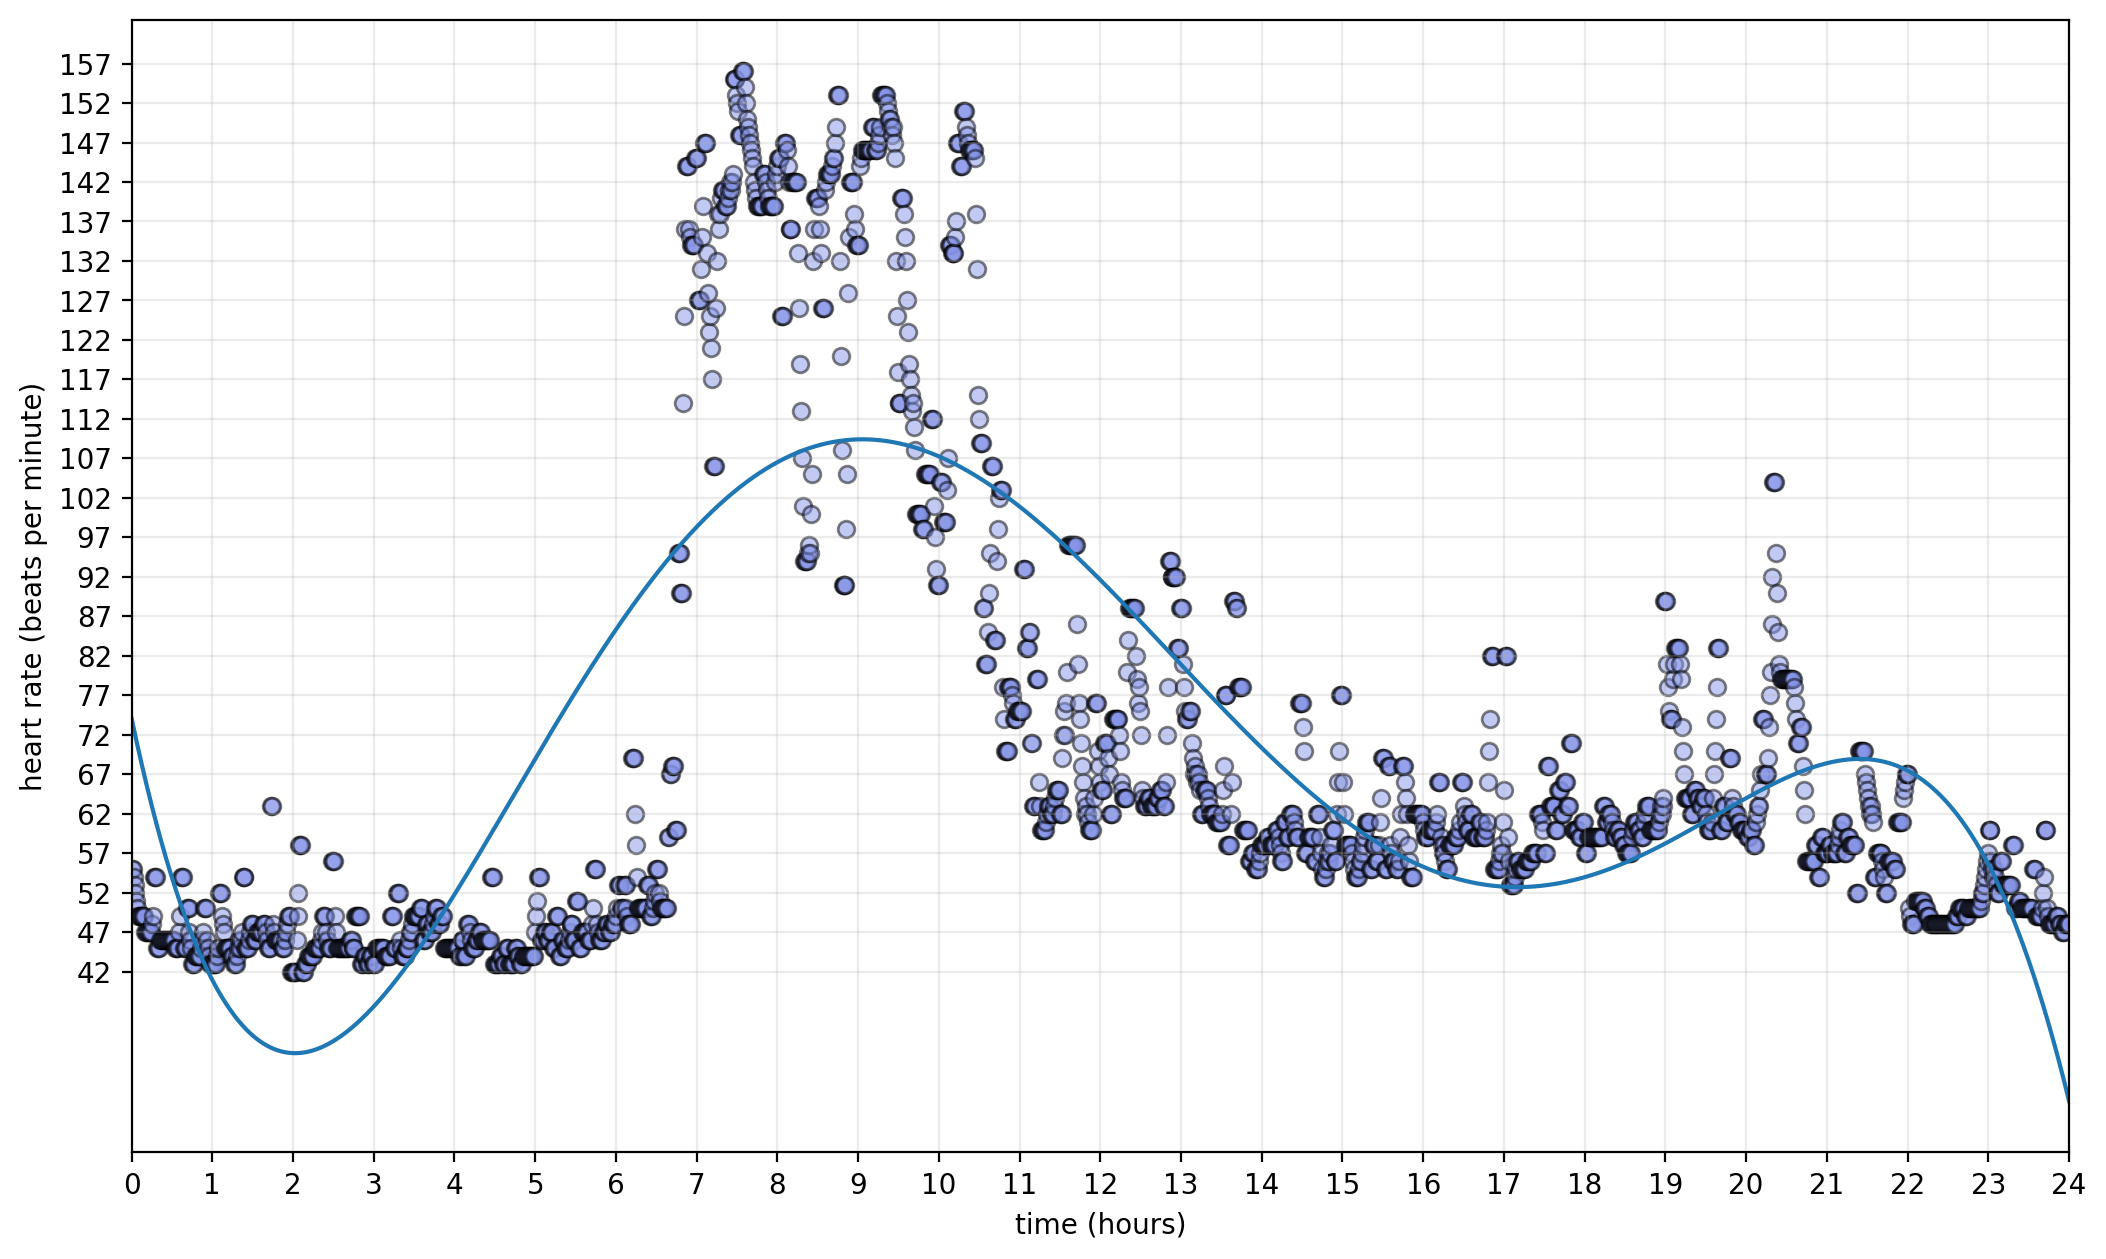

In [5]:
plt.figure(2, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=0, stop=24, num=50*len(Y))
### Don't edit the code above, only add the polynomial regression plotting line below ###
plt.plot(tmp_X,betas[0]+betas[1]*tmp_X+betas[2]*tmp_X**2+betas[3]*tmp_X**3+betas[4]*tmp_X**4+betas[5]*tmp_X**5)
### Don't edit the code below, only add the polynomial regression plotting line above ###
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1d) Run the following code below and add the line you used above to plot the polynomial regresssion line. All I've done is extend the $x$-values that the regression takes beyond what our polynomial regression is trained on. Does the polynomial predict the heart rate at the times before and after the data it trains on? What does this say about the generalizability of the model? Again, is a polynomial regression even a valid model for this problem?

Write your answer as comments below.

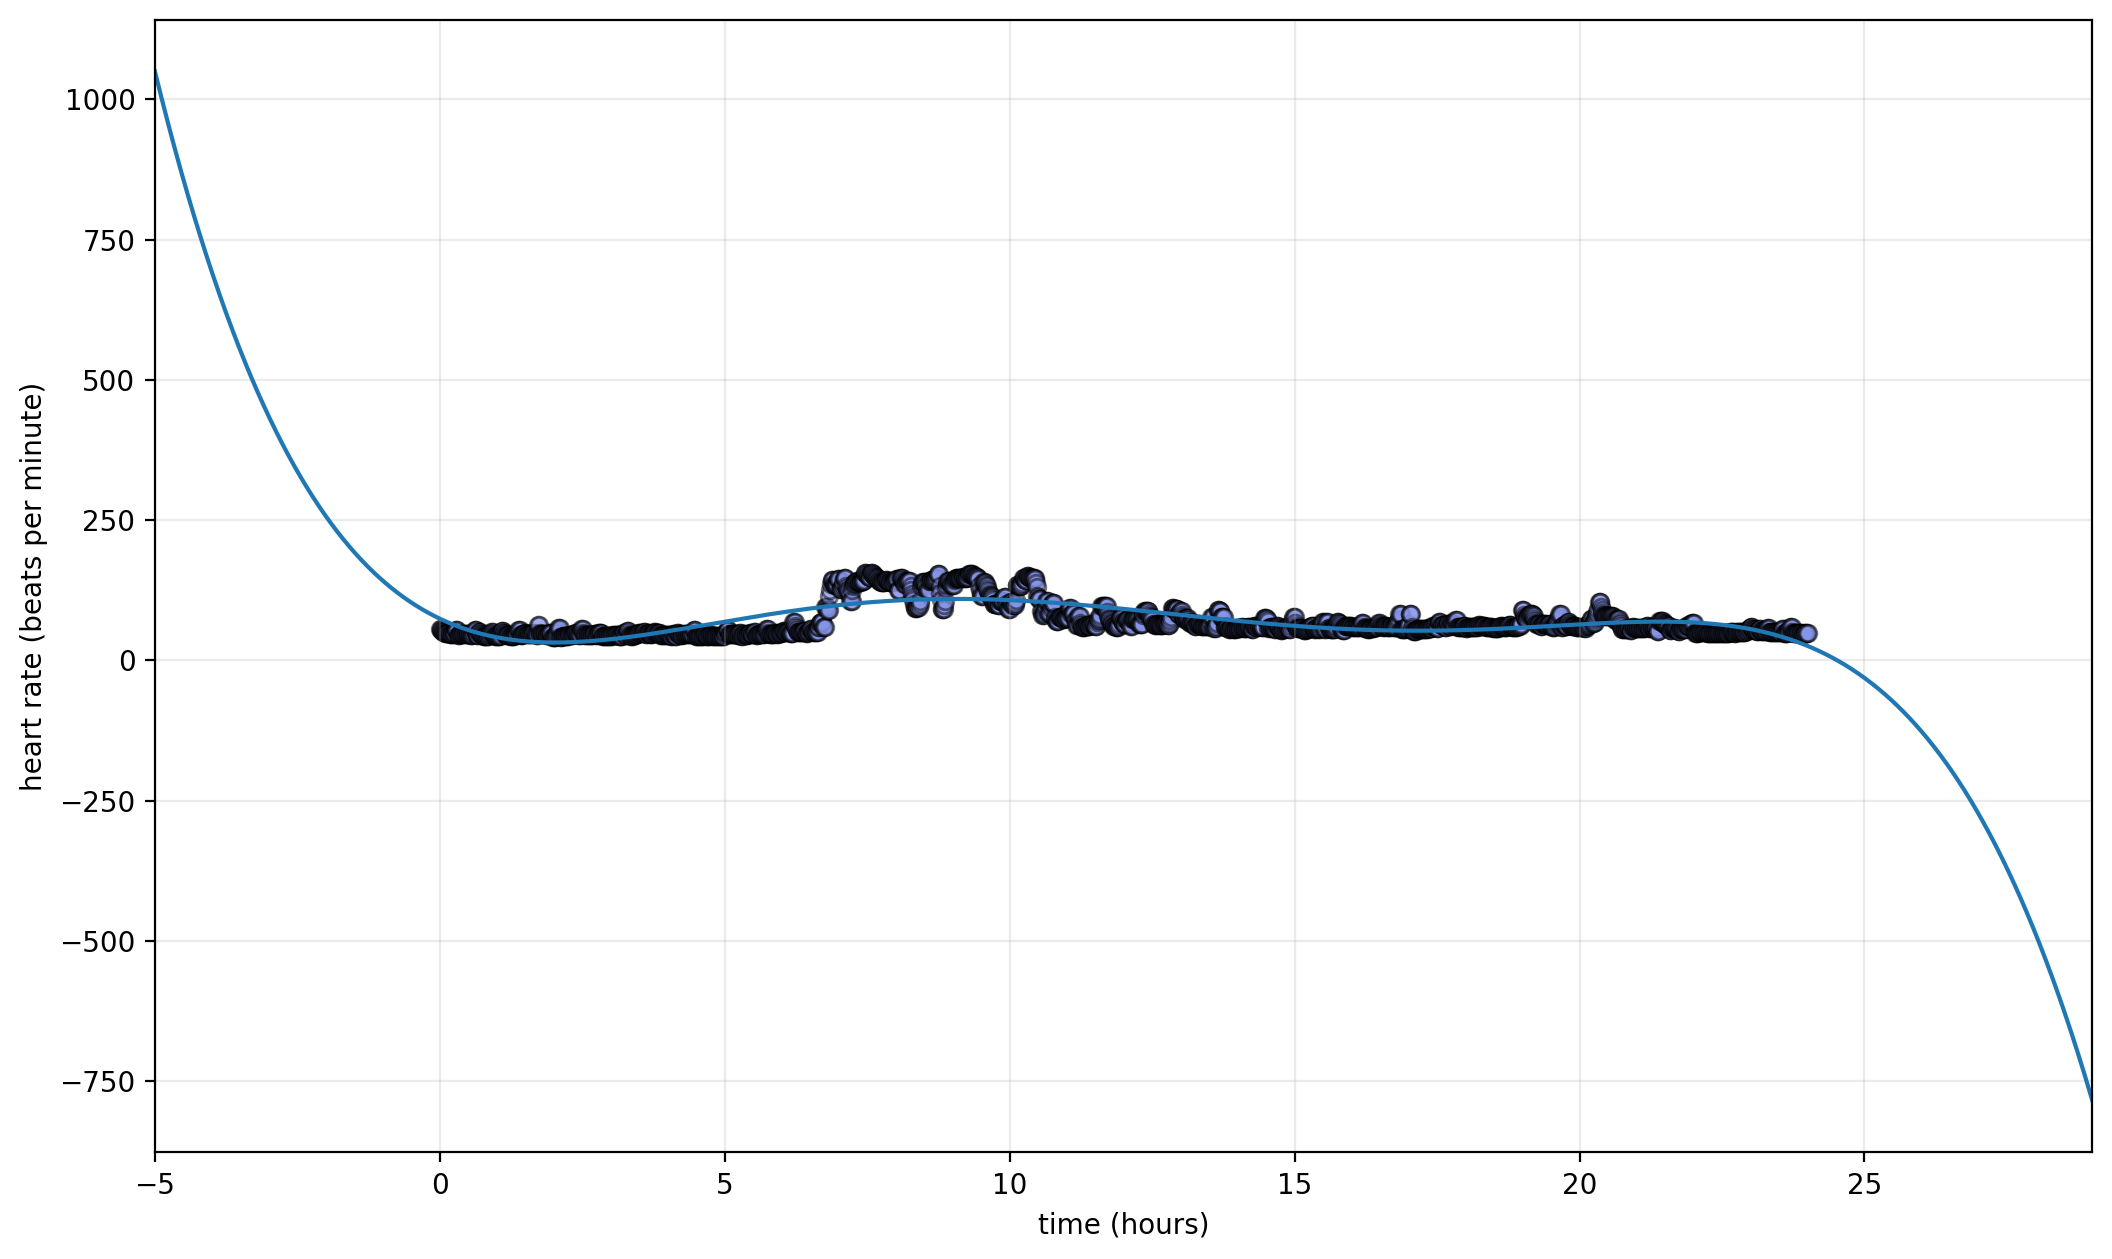

In [6]:
plt.figure(3, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=-5, stop=24+5, num=50*len(Y))
### Don't edit the code above, only add the polynomial regression plotting line below ###
plt.plot(tmp_X,betas[0]+betas[1]*tmp_X+betas[2]*tmp_X**2+betas[3]*tmp_X**3+betas[4]*tmp_X**4+betas[5]*tmp_X**5)
### Don't edit the code below, only add the polynomial regression plotting line below ###
plt.grid(True, alpha=0.25)
plt.xlim(np.min(tmp_X), np.max(tmp_X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1e) Try to find the derivative (or the gradient) of the signal. Remember that you do not have access to the symbolic function that produces this data, i.e. you don't have $f(x)$ such that you can just simply write code for $f'(x)$, the derivative of that function. This implies that the derivative of this signal has to be taken _numerically_. Use the `numpy` function that calculates the gradient on the data for this signal. Read the documentation for the function. First define the following terms:
1. Finite difference
2. Forward difference & Backward difference
3. Central difference

Then answer, how does the `numpy` function that you've found and are about to use use forward, backward, and central differences to calculate the gradient numerically? (For which values is the gradient or the derivative of the signal calculated using the forward difference, what about the backward difference, and what about the central difference?)

Then use the `numpy` function to calculate the gradient of the signal and plot it against the original data. Does the value of the derivative make sense? 

##### NOTE:
It might not like the shape of the data array you're feeding it. Look up the `numpy` function called `np.squeeze()`, read its documention and use it on your data before applying the gradient.

Write your answer below. Fill out the code block after.

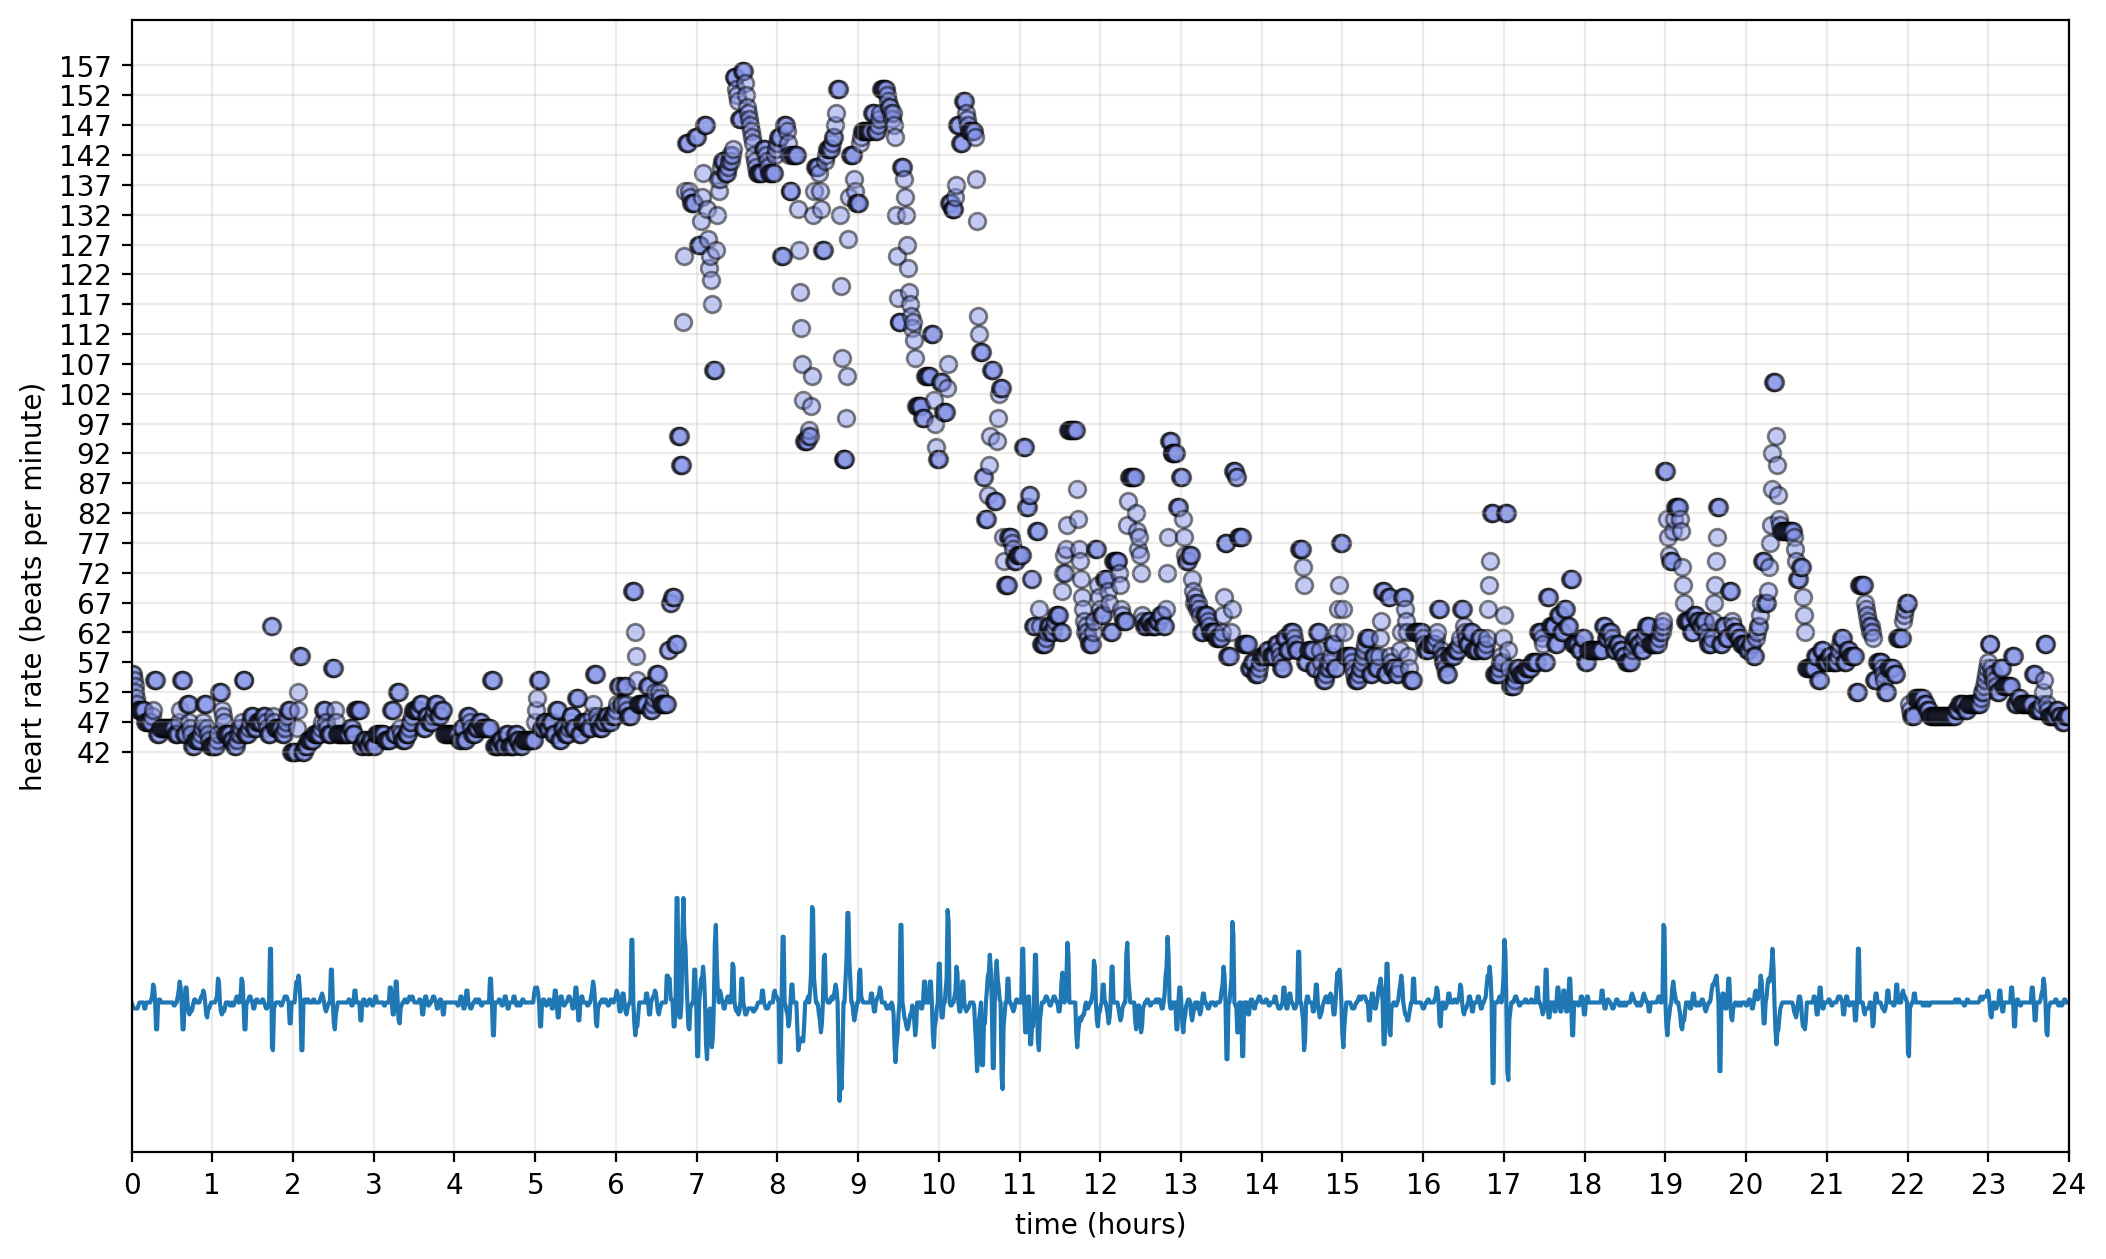

In [12]:
plt.figure(4, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=0, stop=24, num=50*len(Y))
### Don't edit the code above, only add the gradient of the signal below ###
plt.plot(X,np.gradient(np.squeeze(Y)))
### Don't edit the code below, only add the gradient of the signal above ###
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1f) What do the sudden spikes in the gradient represent? Write what you've just calculated in a way where someone who didn't know what a derivative was understood what the blue spikes meant; i.e., this blue spiky line represents the change in... with respect to....

Write your answer below.

(1g) You may be noticing that I'm asking you to write fewer functions of your own, and asking you to use ones that you find online through documentation. This is because in practice, writing functions of your own only really happens in the last step of software development, in either academic or industrial research. This is because the functions that exist already are likely, faster, more well-behaved, and tested more than the functions you write are. This is not a bad thing and is in fact very good, because for one, it ensures open science and reproducbility amongst programmers, and encourages good code-writing practices. One issue is that it introduces narrow-minded ways of programming and limits the motivation for innovating. However, with the recent advances in devops such as Kubernetes, cloud storage and engineering such as AWS, and low-level environment control such as Docker, it seems as though using APIs, which are large codebases provided by companies and code-writing groups, may (will) be the future. `numpy` is already one such (free) API!

I'll introduce you to a simple example of this here. Our goal is going to be to calculate the _moving average_ of this signal. Look up what a moving average is, and define it here. Should the moving average make the signal look _smoother_ or _rougher_? Any implementation of a moving average takes in as a parameter or argument, something called the _moving window size_. What is this parameter for?

(1h) Install the library called `bottleneck` [Bottleneck](https://pypi.org/project/Bottleneck/) on your system. Use the terminal in `JupyterLab` to do this. Use the command `pip install Bottleneck` in your terminal. It might be that you've already had this installed, in the case that your terminal returns `Requirement already satisfied`. Take a minute to read the documentation on the website. What advantages does this library of functions provide? Look up what the programming language C is and compare it to Python, if you're unsure.

Write your answer below.

(1i)